# Context-Free Grammars and Parsing with NLTK
Partially taken from the NLTK book


## Initializations:


In [161]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

%matplotlib inline

### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt-get update
!apt install ghostscript python3-tk
#from ctypes.util import find_library
#find_library("gs")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.10).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-c

## Loading a CFG grammar:

In [162]:
import nltk

from nltk import CFG
from IPython.display import display

grammar = CFG.fromstring("""
   S -> NP VP
   PP -> P NP
   NP -> Det N | NP PP
   VP -> V NP | VP PP
   Det -> 'a' | 'the'
   N -> 'dog' | 'cat'
   V -> 'chased' | 'sat'
   P -> 'on' | 'in'
 """)

## Analyzing sentences:

In [163]:
sent1 = "the dog chased the cat".split()
sent2 = "the dog chased the cat on the dog".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sent1): print(p)

(S (NP (Det the) (N dog)) (VP (V chased) (NP (Det the) (N cat))))


### Viewing the syntax tree:

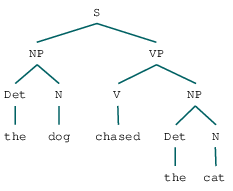

In [164]:
# A single parse tree
display(p)

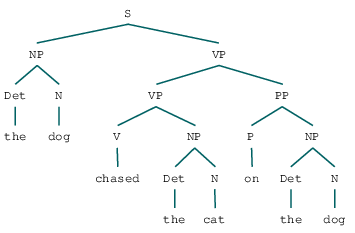

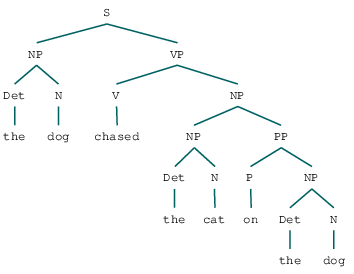

In [165]:
# When there are several analyses
for p in chart_parser.parse(sent2): display(p)

## Generating sentences given a CFG:


In [166]:
from nltk.parse.generate import generate, demo_grammar
from nltk import CFG
grammar = CFG.fromstring(demo_grammar)
print(grammar)

Grammar with 13 productions (start state = S)
    S -> NP VP
    NP -> Det N
    PP -> P NP
    VP -> 'slept'
    VP -> 'saw' NP
    VP -> 'walked' PP
    Det -> 'the'
    Det -> 'a'
    N -> 'man'
    N -> 'park'
    N -> 'dog'
    P -> 'in'
    P -> 'with'


In [167]:
for sentence in generate(grammar, n=50, depth=5):
     print(' '.join(sentence))

the man slept
the man saw the man
the man saw the park
the man saw the dog
the man saw a man
the man saw a park
the man saw a dog
the park slept
the park saw the man
the park saw the park
the park saw the dog
the park saw a man
the park saw a park
the park saw a dog
the dog slept
the dog saw the man
the dog saw the park
the dog saw the dog
the dog saw a man
the dog saw a park
the dog saw a dog
a man slept
a man saw the man
a man saw the park
a man saw the dog
a man saw a man
a man saw a park
a man saw a dog
a park slept
a park saw the man
a park saw the park
a park saw the dog
a park saw a man
a park saw a park
a park saw a dog
a dog slept
a dog saw the man
a dog saw the park
a dog saw the dog
a dog saw a man
a dog saw a park
a dog saw a dog


## Example: issues in grammar design: avoid unnecessary ambiguity


(ADJP
  (ADJP (ADJP (ADJP white) (ADJP expensive)) (ADJP tall))
  (ADJP small))


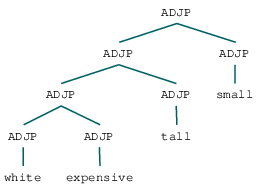

(ADJP
  (ADJP (ADJP white) (ADJP (ADJP expensive) (ADJP tall)))
  (ADJP small))


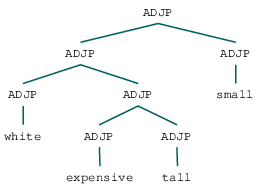

(ADJP
  (ADJP white)
  (ADJP (ADJP (ADJP expensive) (ADJP tall)) (ADJP small)))


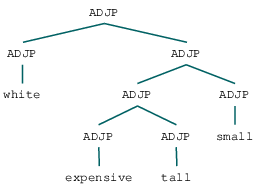

(ADJP
  (ADJP white)
  (ADJP (ADJP expensive) (ADJP (ADJP tall) (ADJP small))))


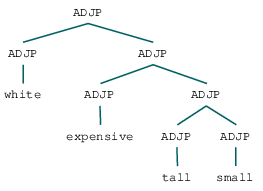

(ADJP
  (ADJP (ADJP white) (ADJP expensive))
  (ADJP (ADJP tall) (ADJP small)))


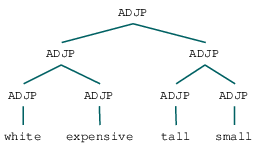

In [168]:
import nltk
from nltk import CFG

grammar = CFG.fromstring("""
   ADJP -> ADJP ADJP
   ADJP -> 'white' | 'tall' | 'small' | 'expensive'
""")

sentence = "white expensive tall small".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sentence): 
    print(p)
    display(p)

## Exercise: rewrite the grammar so that there is only a single analysis for adjective chains

(ADJP
  (ADJ white)
  (ADJP (ADJ expensive) (ADJP (ADJ tall) (ADJP (ADJ small)))))


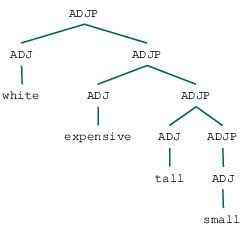

In [169]:
grammar2 = CFG.fromstring("""
   # Design your new ADJP grammar based on this one:
   ADJP -> ADJ ADJP | ADJ
   ADJ -> 'white' | 'tall' | 'small' | 'expensive'
""")

sentence = "white expensive tall small".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar2)

# View the analysis
for p in chart_parser.parse(sentence): 
    print(p)
    display(p)

## Exercise (homework assignment)

Take the following grammar:

In [170]:
from nltk import CFG

grammar = CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | NP PP
NP -> Det ADJ N
VP -> V NP | VP PP
Det -> 'a' | 'the'
N -> 'dog' | 'cat'
V -> 'chased' | 'sat'
P -> 'on' | 'in'
ADJ -> 'big' | ADJ 'big'
S1 -> NP VP | NP V
S -> S CORD S1
CORD -> 'and'
""")

Write rules:
* Simple sentences:
  * the big white cat sat on the dog
  * today the big white cat sat on the dog
  * Sally ate a sandwich .
  * Sally and the president wanted and ate a sandwich .
  * the president sighed .
  * the president thought that a sandwich sighed .
  * it perplexed the president that a sandwich ate Sally .
  * the very very very perplexed president ate a sandwich .
  * the president worked on every proposal on the desk .
* Relative clauses:
  * the cat that the dog chased chased the dog
* Coordination:
  * The cat and the dog chased the cat
* **Always save the last correct grammar (and example sentences)!** <br> Any change can have positive or negative effects, and there must always be a way to go back to the last correct version
* Document the resulting grammar: range of syntactic constructions covered, example analyses, limitations, ...
* Provide 5 random sentences generated with your last version of the grammar  illustrating your modifications.

Something to start with:

(S
  (NP (Det the) (ADJ big) (N dog))
  (VP (V chased) (NP (Det the) (ADJ big) (N cat))))


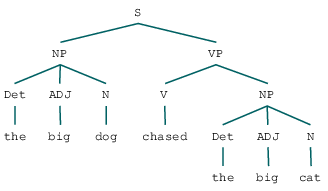

In [171]:
sentence = "the big dog chased the big cat".split()

# Create an analyzer from the grammar
chart_parser = nltk.ChartParser(grammar)

# View the analysis
for p in chart_parser.parse(sentence): 
    print(p)
    display(p)

In [172]:
for sentence in generate(grammar, n=50, depth=5):
    print(' '.join(sentence))

a dog chased a dog
a dog chased a cat
a dog chased the dog
a dog chased the cat
a dog chased a big dog
a dog chased a big cat
a dog chased the big dog
a dog chased the big cat
a dog sat a dog
a dog sat a cat
a dog sat the dog
a dog sat the cat
a dog sat a big dog
a dog sat a big cat
a dog sat the big dog
a dog sat the big cat
a cat chased a dog
a cat chased a cat
a cat chased the dog
a cat chased the cat
a cat chased a big dog
a cat chased a big cat
a cat chased the big dog
a cat chased the big cat
a cat sat a dog
a cat sat a cat
a cat sat the dog
a cat sat the cat
a cat sat a big dog
a cat sat a big cat
a cat sat the big dog
a cat sat the big cat
the dog chased a dog
the dog chased a cat
the dog chased the dog
the dog chased the cat
the dog chased a big dog
the dog chased a big cat
the dog chased the big dog
the dog chased the big cat
the dog sat a dog
the dog sat a cat
the dog sat the dog
the dog sat the cat
the dog sat a big dog
the dog sat a big cat
the dog sat the big dog
the dog 

### Description

I contructed a grammar from scratch based of the examples from the slides, that are taken from Eisenstein 2019. These rules use the Penn Treebank tags. They cover many syntactic constructions.

I contructed a lexicon that has most of the words that are present in the examples. In the case of closed class tags, I added more words than the ones in the examples. I also added all the verb forms for each verb even if some were not used in the examples.

I added more rules to complete some cases. For example, in the Verb Phrase section I added options for all the verb types.

I also removed or commented some problematic or unnecessary rules to reduce ambiguity. There are still some ambiguity cases that cannot be removed. For example, some verbs have the same form in past tense and past participle, which results in more than one tree.

### Sentence

In [249]:
# Basic Rule
rules = "S -> NP VP" + "\n"

# Other Rules

# unfortunately Abigail ate the kimchi
rules += "S -> ADVP NP VP" + "\n"

# Abigail ate the kimchi and Max had a burger
rules += "S -> S CC S" + "\n"

# eat the kimchi
# rules += "S -> VP" + "\n"

In [250]:
# coordinating conjunctions
lexicon = "CC -> 'and' | 'or'" + "\n"

### Noun Phrase

In [251]:
# singular, plural, and proper nouns, personal pronouns
rules += "NP -> NN | NNS | NNP | PRP" + "\n"

# determiners
rules += "NP -> DT NN | DT NNS | DT NNP" + "\n"

# compund nouns
rules += "NP -> NN NN | NN NNS | DT NN NN | DT NN NNS" + "\n"

# Recursive NP Phrases

# the red and the black
rules += "NP -> NP CC NP" + "\n"

# the President of the Georgia Institute of Technology
rules += "NP -> NP PP" + "\n"

# a whale which he had wounded
rules += "NP -> NP SBAR" + "\n"

# a whale taken near Shetland
# rules += "NP -> NP VP" + "\n"

In [252]:
# singular nouns
lexicon += "NN -> 'dog' | 'cat' | 'whale' | 'kimchi' | 'burger' | 'algebra' | 'brother'" + "\n"

# plural nouns
lexicon += "NNS -> 'dogs' | 'cats' | 'whales' | 'burgers'" + "\n"

# proper nouns
lexicon += "NNP -> 'Abigail' | 'Max' | 'President' | 'Georgia' | 'Institute' | 'Technology' | 'Shetland'" + "\n"

# personal pronouns
lexicon += "PRP -> 'I' | 'you' | 'he' | 'she' | 'it' | 'we' | 'they' | 'me' | 'him' | 'her' | 'us' | 'them'" + "\n"

# determiners
lexicon += "DT -> 'all' | 'a' | 'an' | 'another' | 'any' | 'both' | 'each' | 'either' | 'every' | 'many' | 'much' | 'neither' | 'no'" + "\n"
lexicon += "DT -> 'some' | 'such' | 'that' | 'the' | 'them' | 'these' | 'this' | 'those'" + "\n"

### Verb Phrase

In [253]:
# base form (VB: she likes to snack), present-tense third-person singular
# (VBZ: she snacks), present tense but not third-person singular (VBP: they
# snack), past tense (VBD: they snacked), present participle (VBG: they are
# snacking), and past participle (VBN: they had snacked)
rules += "VP -> VB | VBZ | VBD | VBN | VBG | VBP" + "\n"

# Recursive VP Phrases:

# she will snack
rules += "VP -> MD VP" + "\n"

# she had snacked
rules += "VP -> VBD VP" + "\n"

# she has been snacking
rules += "VP -> VBZ VP" + "\n"

# they have been snacking
rules += "VP -> VBP VP" + "\n"

# she had been snacking
rules += "VP -> VBN VP" + "\n"

# she wants to snack
rules += "VP -> TO VP" + "\n"

# she buys and eats many snacks
# rules += "VP -> VP CC VP" + "\n"

# Verb complement:

# she teaches algebra
rules += "VP -> VBZ NP" + "\n"

# they teach algebra
rules += "VP -> VBP NP" + "\n"

# she has been teaching algebra
rules += "VP -> VBG NP" + "\n"

# she taught algebra
rules += "VP -> VBD NP" + "\n"

# she had taught algebra
rules += "VP -> VBN NP" + "\n"

# Verb complements:

# she teaches her brother algebra
rules += "VP -> VBZ NP NP" + "\n"

# they teach her brother algebra
rules += "VP -> VBP NP NP" + "\n"

# she has been teaching her brother algebra
rules += "VP -> VBG NP NP" + "\n"

# she taught her brother algebra
rules += "VP -> VBD NP NP" + "\n"

# she had taught her brother algebra
rules += "VP -> VBN NP NP" + "\n"

# Complement Clauses:

# she thinks that Tristan ate the kimchi
rules += "VP -> VBZ SBAR" + "\n"

# they think that Tristan ate the kimchi
rules += "VP -> VBP SBAR" + "\n"

# she was thinking that Tristan ate the kimchi
rules += "VP -> VBG SBAR" + "\n"

# she knew that Tristan ate the kimchi
rules += "VP -> VBD SBAR" + "\n"

# she had known that Tristan ate the kimchi
rules += "VP -> VBN SBAR" + "\n"

# Prepositional Phrases:

# she studies at night
rules += "VP -> VBZ PP" + "\n"

# they study at night
rules += "VP -> VBP PP" + "\n"

# she was studying at night
rules += "VP -> VBG PP" + "\n"

# she studied at night
rules += "VP -> VBD PP" + "\n"

# she had studied at night
rules += "VP -> VBN PP" + "\n"

# Adverbial Phrases:

# she studies intensively
rules += "VP -> VBZ ADVP" + "\n"

# they study intensively
rules += "VP -> VBP ADVP" + "\n"

# she was studying intensively
rules += "VP -> VBG ADVP" + "\n"

# she studied intensively
rules += "VP -> VBD ADVP" + "\n"

# she had studied intensively
rules += "VP -> VBN ADVP" + "\n"

# Adjectival Phrases:

# she is hungry
rules += "VP -> VBZ ADJP" + "\n"

# they are hungry
rules += "VP -> VBP ADJP" + "\n"

# she was feeling hungry
rules += "VP -> VBG ADJP" + "\n"

# she was hungry
rules += "VP -> VBD ADJP" + "\n"

# she had been hungry
rules += "VP -> VBN ADJP" + "\n"

In [254]:
# verb base form
lexicon += "VB -> 'snack' | 'teach' | 'study' | 'eat' | 'be' | 'have'" + "\n"

# verb past tense
lexicon += "VBD -> 'snacked' | 'taught' | 'studied' | 'ate' | 'was' | 'were' | 'had' | 'said'" + "\n"

# verb gerund or present participle
lexicon += "VBG -> 'snacking' | 'teaching' | 'studying' | 'eating' | 'being' | 'having'" + "\n"

# verb past participle
lexicon += "VBN -> 'snacked' | 'taught' | 'studied' | 'eaten' | 'been' | 'had'" + "\n"

# verb, non-3rd person singular present
lexicon += "VBP -> 'snack' | 'teach' | 'study' | 'eat' | 'are' | 'have'" + "\n"

# verb, 3rd person singular present
lexicon += "VBZ -> 'snacks' | 'teaches' | 'studies' | 'eats' | 'is' | 'has'" + "\n"

# modal verb
lexicon += "MD -> 'can' | 'could' | 'may' | 'might' | 'must' | 'need' | 'ought' | 'shall' | 'will'" + "\n"

# to
lexicon += "TO -> 'to'" + "\n"

### Prepositional Phrase

In [255]:
# the whiteness of the whale
rules += "PP -> IN NP" + "\n"

# what the white whale was to Ahab, has been hinted
rules += "PP -> TO NP" + "\n"

# on time and under budget
rules += "PP -> PP CC PP" + "\n"

In [256]:
# preposition
lexicon += "IN -> 'among' | 'upon' | 'in' | 'on' | 'into' | 'below' | 'atop' | 'until' | 'over' | 'under' | 'towards' | 'of' | 'to'" + "\n"

### Complement Clause

In [257]:
# she said that it was spicy
rules += "SBAR -> IN S" + "\n"

# she said it was spicy
# rules += "SBAR -> S" + "\n"

# whether they want control or whether they want exports
rules += "SBAR -> SBAR CC SBAR" + "\n"

In [258]:
# subordinating conjunction
lexicon += "IN -> 'which' | 'that' | 'whether' | 'despite' | 'if'" + "\n"

###  Adverbial Phrase

In [259]:
# adverb, comparative and superlative
rules += "ADVP -> RB | RBR | RBS" + "\n"

# they went considerably further
rules += "ADVP -> RB RBR" + "\n"

# they went considerably further than before
rules += "ADVP -> ADVP PP" + "\n"

# now and two years ago
rules += "ADVP -> ADVP CC ADVP" + "\n"

In [260]:
# adverb
lexicon += "RB -> 'considerably' | 'very' | 'even' | 'previously' | 'increasingly'" + "\n"
lexicon += "RB -> 'unlikely' | 'intensively' | 'now' | 'before' | 'rather' | 'unfortunately'" + "\n"

# adverb comparative
lexicon += "RBR -> 'further' | 'more'" + "\n"

# adverb superlative
lexicon += "RBS -> 'furthest' | 'most' | 'best'" + "\n"

### Adjectival Phrase

In [261]:
# adjective, comparative and superlative
rules += "ADJP -> JJ | JJR | JJS" + "\n"

# very hungry
rules += "ADJP -> RB JJ" + "\n"

# more hungry
rules += "ADJP -> RBR JJ" + "\n"

# best possible
rules += "ADJP -> RBS JJ" + "\n"

# even bigger
rules += "ADJP -> RB JJR" + "\n"

# West German
rules += "ADJP -> JJ JJ" + "\n"

# previously reported
rules += "ADJP -> RB VBN" + "\n"

# quaint and rather deceptive
rules += "ADJP -> ADJP CC ADJP"

In [262]:
# adjective
lexicon += "JJ -> 'hungry' | 'possible' | 'high' | 'mighty' | 'West' | 'German'" + "\n"
lexicon += "JJ -> 'quaint' | 'deceptive' | 'spicy' | 'white' | 'red' | 'black'" + "\n"

# adjective comparative
lexicon += "JJR -> 'bigger'" + "\n"

# adjective superlative
lexicon += "JJS -> 'best'"

### Grammar

In [263]:
print(rules)

S -> NP VP
S -> ADVP NP VP
S -> S CC S
NP -> NN | NNS | NNP | PRP
NP -> DT NN | DT NNS | DT NNP
NP -> NN NN | NN NNS | DT NN NN | DT NN NNS
NP -> NP CC NP
NP -> NP PP
NP -> NP SBAR
VP -> VB | VBZ | VBD | VBN | VBG | VBP
VP -> MD VP
VP -> VBD VP
VP -> VBZ VP
VP -> VBP VP
VP -> VBN VP
VP -> TO VP
VP -> VBZ NP
VP -> VBP NP
VP -> VBG NP
VP -> VBD NP
VP -> VBN NP
VP -> VBZ NP NP
VP -> VBP NP NP
VP -> VBG NP NP
VP -> VBD NP NP
VP -> VBN NP NP
VP -> VBZ SBAR
VP -> VBP SBAR
VP -> VBG SBAR
VP -> VBD SBAR
VP -> VBN SBAR
VP -> VBZ PP
VP -> VBP PP
VP -> VBG PP
VP -> VBD PP
VP -> VBN PP
VP -> VBZ ADVP
VP -> VBP ADVP
VP -> VBG ADVP
VP -> VBD ADVP
VP -> VBN ADVP
VP -> VBZ ADJP
VP -> VBP ADJP
VP -> VBG ADJP
VP -> VBD ADJP
VP -> VBN ADJP
PP -> IN NP
PP -> TO NP
PP -> PP CC PP
SBAR -> IN S
SBAR -> SBAR CC SBAR
ADVP -> RB | RBR | RBS
ADVP -> RB RBR
ADVP -> ADVP PP
ADVP -> ADVP CC ADVP
ADJP -> JJ | JJR | JJS
ADJP -> RB JJ
ADJP -> RBR JJ
ADJP -> RBS JJ
ADJP -> RB JJR
ADJP -> JJ JJ
ADJP -> RB VBN
ADJP -> AD

### Lexicon

In [264]:
print(lexicon)

CC -> 'and' | 'or'
NN -> 'dog' | 'cat' | 'whale' | 'kimchi' | 'burger' | 'algebra' | 'brother'
NNS -> 'dogs' | 'cats' | 'whales' | 'burgers'
NNP -> 'Abigail' | 'Max' | 'President' | 'Georgia' | 'Institute' | 'Technology' | 'Shetland'
PRP -> 'I' | 'you' | 'he' | 'she' | 'it' | 'we' | 'they' | 'me' | 'him' | 'her' | 'us' | 'them'
DT -> 'all' | 'a' | 'an' | 'another' | 'any' | 'both' | 'each' | 'either' | 'every' | 'many' | 'much' | 'neither' | 'no'
DT -> 'some' | 'such' | 'that' | 'the' | 'them' | 'these' | 'this' | 'those'
VB -> 'snack' | 'teach' | 'study' | 'eat' | 'be' | 'have'
VBD -> 'snacked' | 'taught' | 'studied' | 'ate' | 'was' | 'were' | 'had' | 'said'
VBG -> 'snacking' | 'teaching' | 'studying' | 'eating' | 'being' | 'having'
VBN -> 'snacked' | 'taught' | 'studied' | 'eaten' | 'been' | 'had'
VBP -> 'snack' | 'teach' | 'study' | 'eat' | 'are' | 'have'
VBZ -> 'snacks' | 'teaches' | 'studies' | 'eats' | 'is' | 'has'
MD -> 'can' | 'could' | 'may' | 'might' | 'must' | 'need' | 'ough

### Parse

In [265]:
grammar = CFG.fromstring(rules + "\n" + lexicon)
chart_parser = nltk.ChartParser(grammar)

def parse(sentence):
    for p in chart_parser.parse(sentence.split()): 
        display(p)

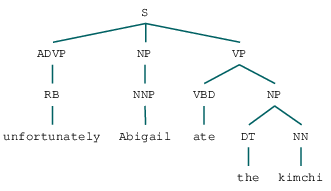

In [266]:
parse("unfortunately Abigail ate the kimchi")

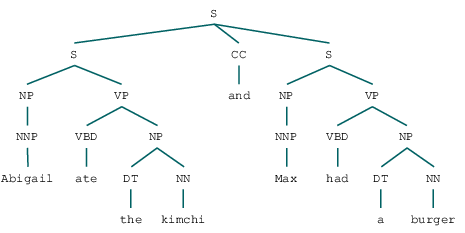

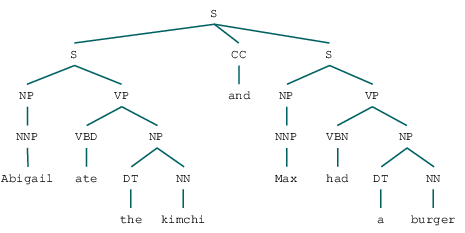

In [267]:
parse("Abigail ate the kimchi and Max had a burger")

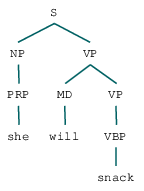

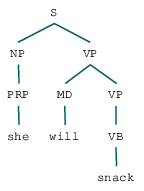

In [268]:
parse("she will snack")

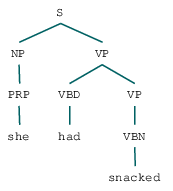

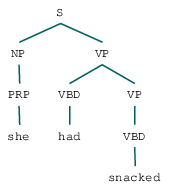

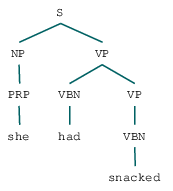

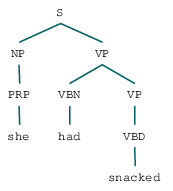

In [269]:
parse("she had snacked")

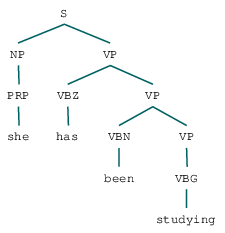

In [270]:
parse("she has been studying")

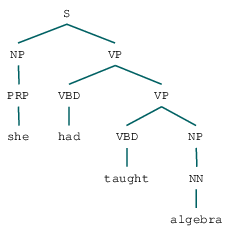

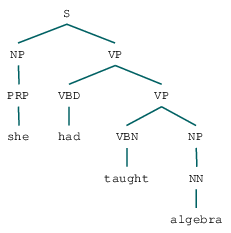

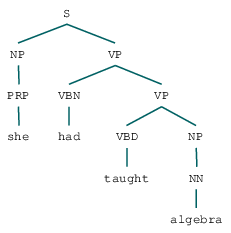

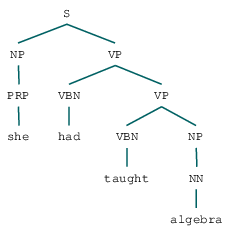

In [271]:
parse("she had taught algebra")

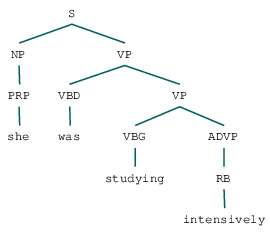

In [272]:
parse("she was studying intensively")

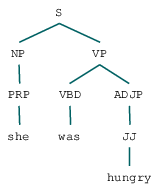

In [273]:
parse("she was hungry")

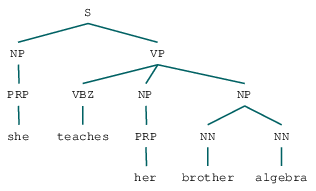

In [274]:
parse("she teaches her brother algebra")

### Generate

In [275]:
from random import sample
sentences = generate(grammar, n=1000000, depth=5)
random_sentences = sample(list(sentences), 50)
for sentence in random_sentences:
    print(' '.join(sentence))

dog snacks much Max no dog dog
dog snacks much Max an dog dogs
dog snacks many cat the algebra
dog snacks every burger some dog dogs
dog snacks kimchi burger these burger cat
dog snacks that whale a whale whale
dog snacks some dogs either algebra burgers
dog snacks neither burgers them dog whales
dog snacks another Institute those cat cat
dog snacks some kimchi such brother
dog snacks those Abigail both brother whale
dog snacks neither Technology a burger kimchi
dog snacks another algebra both burger
dog snacks the whale every algebra whale
dog snacks each Max those whale whales
dog snacks all whales every dog whales
dog snacks an algebra neither burger burgers
dog snacks dog algebra any whale whales
dog snacks such brother either dog brother
dog can had
dog snacks this Shetland both kimchi algebra
dog snacks these dogs both whale burgers
dog snacks every kimchi this brother algebra
dog snacks kimchi brother some dog dog
dog snacks him any burger burgers
dog snacks every whales this ca